<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Trabajo Práctico Nº6
#### Mathilde d'Hébrail





### Configuracion e inicio de la simulacion

In [53]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,5)
import matplotlib.pyplot as plt
import scipy.signal as sg
import warnings
warnings.filterwarnings('ignore')
import math
from scipy.stats import binom
import cmath
import spectrum as sp
import scipy.io as sio
from scipy.io.wavfile import write



#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi
fig_font_size = 16
plt.rcParams.update({'font.size':fig_font_size})



def vertical_flaten(a):

    return a.reshape(a.shape[0], 1)


# SNR = 3

### Reading the ECG

[('ecg_lead', (1129116, 1), 'double'), ('qrs_pattern1', (113, 1), 'double'), ('heartbeat_pattern1', (411, 1), 'double'), ('heartbeat_pattern2', (441, 1), 'double'), ('qrs_detections', (1903, 1), 'double')]


Text(0.5, 1.0, 'Heartbeat patern 2')

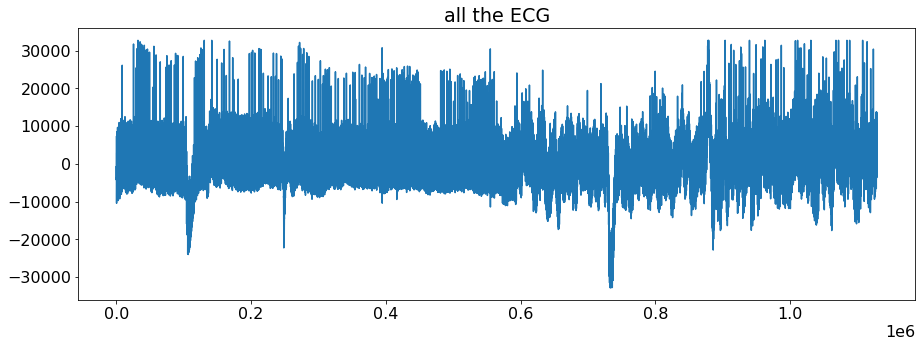

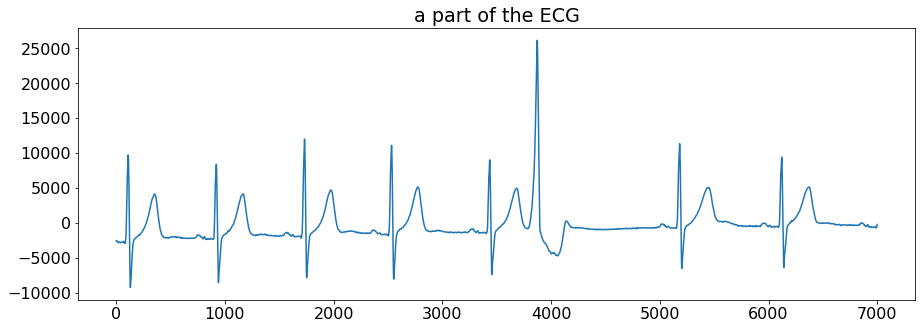

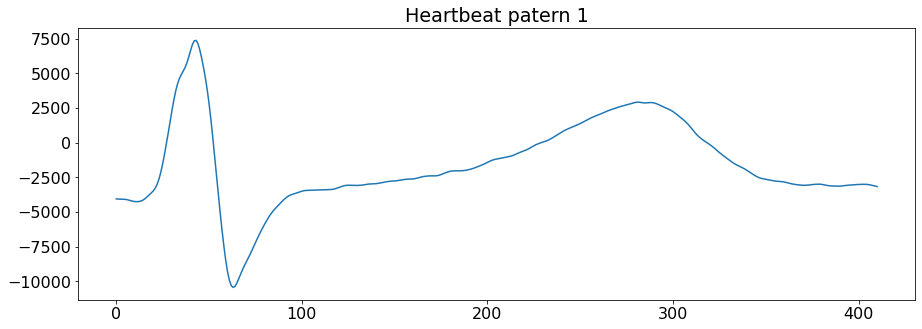

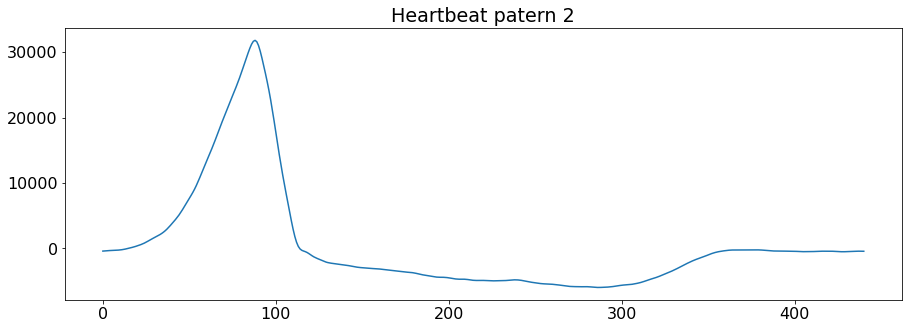

In [55]:
fs_ecg = 1000 # Hz

# para listar las variables que hay en el archivo
print(sio.whosmat('ECG_TP4.mat'))
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])
N = len(ecg_one_lead)

hb_1 = vertical_flaten(mat_struct['heartbeat_pattern1'])
hb_2 = vertical_flaten(mat_struct['heartbeat_pattern2'])

plt.figure()
plt.plot(ecg_one_lead)
plt.title("all the ECG")

plt.figure()
plt.plot(ecg_one_lead[5000:12000])
plt.title("a part of the ECG")

plt.figure()
plt.plot(hb_1)
plt.title("Heartbeat patern 1")

plt.figure()
plt.plot(hb_2)
plt.title("Heartbeat patern 2")


In [65]:
def normalize(d):
    # d is a (n x dimension) np array
    d -= np.min(d, axis=0)
    d /= np.ptp(d, axis=0)
    return d

N=1000

df_ecg = fs_ecg/N # resolución espectral


# grilla de sampleo temporal
tt = np.linspace(0, (N-1)/fs_ecg, N).flatten()

dd = 0.5

data = ecg_one_lead[:N]
data = data.flatten()


# No paramétricos
pP = np.fft.fft(data)
_, pW = sg.welch(data, fs=fs_ecg, nfft=N, window='hanning', nperseg=int(np.round(N/3)) )




description = ['Per', 'Welch']


# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df_ecg, N).flatten()

plt.figure(1)
plt.clf()

psds = 10*np.log10( np.transpose(np.vstack([ pP, pW])))
psds = 10*np.log10( np.transpose(np.vstack([ normalize(pP), normalize(pW)])))

line_hdls = plt.plot(ff[0:int(N/2+1)], psds )
plt.xlabel('frec. [Hz]')
plt.ylabel('PSD [W/Hz]')
plt.grid(which='both', axis='both')
plt.ylim([-50, 10])

# presentar una leyenda para cada tipo de señal
axes_hdl = plt.gca()

# este tipo de sintaxis es *MUY* de Python
axes_hdl.legend(line_hdls, description, loc='upper right'  )


plt.figure(2)
plt.clf()

line_hdls = plt.plot(ff[0:int(N/2+1)], psds )
plt.xlabel('frec. [Hz]')
plt.ylabel('PSD [W/Hz]')
plt.grid(which='both', axis='both')

plt.xlim((N/4 +np.array([-30, 30]))*df)
plt.ylim([-50, 10])
        
# presentar una leyenda para cada tipo de señal
axes_hdl = plt.gca()

# este tipo de sintaxis es *MUY* de Python
axes_hdl.legend(line_hdls, description, loc='upper right'  )

plt.show()

    
# Invocamos a nuestro testbench exclusivamente: 
#my_testbench( sig_props )


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1000 and the array at index 1 has size 501

<Figure size 1080x360 with 0 Axes>

In [66]:
print(data)

[  -760   -887  -1015  -1141  -1264  -1384  -1505  -1629  -1757  -1885
  -2007  -2119  -2223  -2320  -2411  -2495  -2570  -2638  -2704  -2770
  -2836  -2897  -2953  -3004  -3054  -3108  -3169  -3237  -3308  -3379
  -3444  -3500  -3547  -3586  -3619  -3650  -3679  -3707  -3732  -3755
  -3777  -3798  -3821  -3844  -3866  -3887  -3905  -3922  -3940  -3958
  -3977  -3993  -4008  -4019  -4026  -4028  -4024  -4016  -4008  -4000
  -3996  -3994  -3996  -4000  -4006  -4014  -4024  -4034  -4043  -4049
  -4054  -4057  -4061  -4064  -4065  -4062  -4056  -4046  -4036  -4028
  -4023  -4022  -4025  -4030  -4035  -4038  -4038  -4036  -4033  -4031
  -4031  -4036  -4043  -4050  -4055  -4051  -4039  -4019  -3997  -3981
  -3974  -3976  -3983  -3990  -3995  -3995  -3994  -3992  -3994  -3998
  -4005  -4012  -4015  -4015  -4009  -4000  -3988  -3973  -3957  -3943
  -3934  -3931  -3934  -3938  -3942  -3948  -3956  -3966  -3977  -3988
  -3997  -4004  -4010  -4015  -4020  -4022  -4018  -4008  -3991  -3973
  -395

In [67]:
print(pW)
print("Shape of pW:", pW.shape)

[1.19585984e+05 2.59244109e+05 2.97236219e+05 3.12779250e+05
 2.92186688e+05 2.57380125e+05 2.35859391e+05 2.34367562e+05
 2.42468375e+05 2.50538562e+05 2.57479781e+05 2.65292000e+05
 2.72947062e+05 2.76787125e+05 2.74258906e+05 2.65662188e+05
 2.52895281e+05 2.37525359e+05 2.20100766e+05 2.00683703e+05
 1.79625094e+05 1.57844250e+05 1.36494375e+05 1.16434453e+05
 9.80245625e+04 8.13310078e+04 6.64176250e+04 5.34383203e+04
 4.25158555e+04 3.35827539e+04 2.63756816e+04 2.05898809e+04
 1.60066826e+04 1.24732686e+04 9.82065625e+03 7.84379346e+03
 6.34725146e+03 5.18937598e+03 4.28609961e+03 3.58766162e+03
 3.06019067e+03 2.67950000e+03 2.42188794e+03 2.25255591e+03
 2.12817285e+03 2.01257922e+03 1.88869922e+03 1.75940820e+03
 1.63998828e+03 1.54445068e+03 1.47267542e+03 1.40944653e+03
 1.33559912e+03 1.23912207e+03 1.11825647e+03 9.79250916e+02
 8.32966370e+02 6.91137451e+02 5.62379517e+02 4.49063019e+02
 3.47855713e+02 2.55611282e+02 1.75239014e+02 1.13548241e+02
 7.31861649e+01 4.919242